<a href="https://colab.research.google.com/github/muyale/CODSOFT/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [4]:
# loading in my data
df = pd.read_csv("/content/advertising.csv")

In [5]:
# checking my data
df.head() # So my data has 4 variables ,TV,Radio,Newspapers and Sales
# Excluding sales the rest are all advertising costs

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
# checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
# checking for the shape of my data
df.shape

(200, 4)

In [8]:
#checking for basic statistical information
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
# checking for correlation between the variables
sales_corr = df.corr()

In [10]:
sales_corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


from matplotlib import pyplot as plt
sales_corr['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_corr['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_corr['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_corr['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_corr.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_corr.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_corr.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_corr['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sales_corr['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sales_corr['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sales_corr['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

# DATA ANALYSIS

In [ ]:
from matplotlib import pyplot as plt
sales_corr['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

**DATA ANALYSIS **

This section includes visualization for my data .Some of them include histograms ,lineplots ,barplots and correlation heatmaps.My criteria for choosing plots is based on univariate ,multivariate types of data .

Data analysis is the most crucial part of any research. Data analysis summarizes collected data. It involves the interpretation of data gathered through the use of analytical and logical reasoning to determine patterns, relationships or trends.It gives us an idea of what to expect from the research.

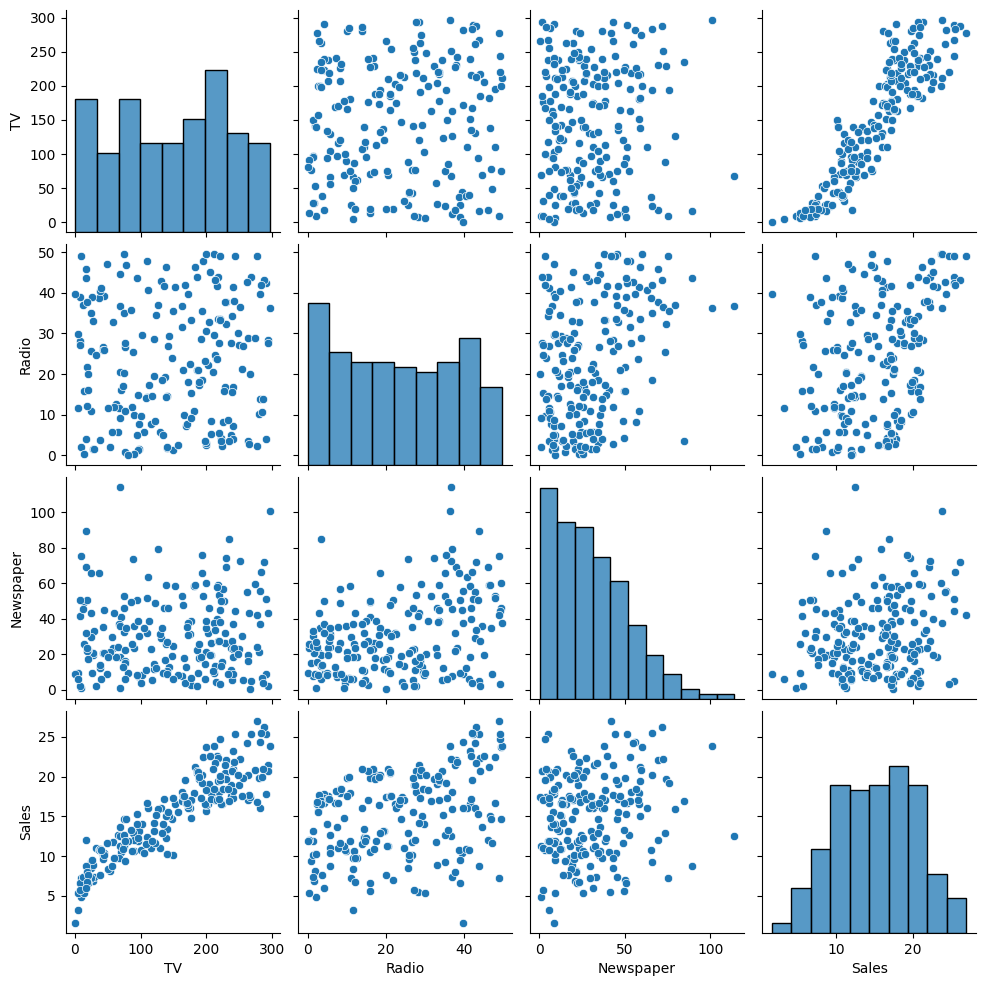

In [49]:
# First I will plot Pairplot  which will give me an idea of the various relationships in my data
sns.pairplot(df)

In [11]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [17]:
# I will create a function that returns a plotted histogram
def plot_histogram(column,df=df):
  fig = plt.figure(figsize=(20,8))
  sns.histplot(x=column,data=df)
  plt.xlabel(column)
  plt.ylabel("Total in Frequency")
  plt.title(f"Distribution of {column} advertising costs")
  plt.show()

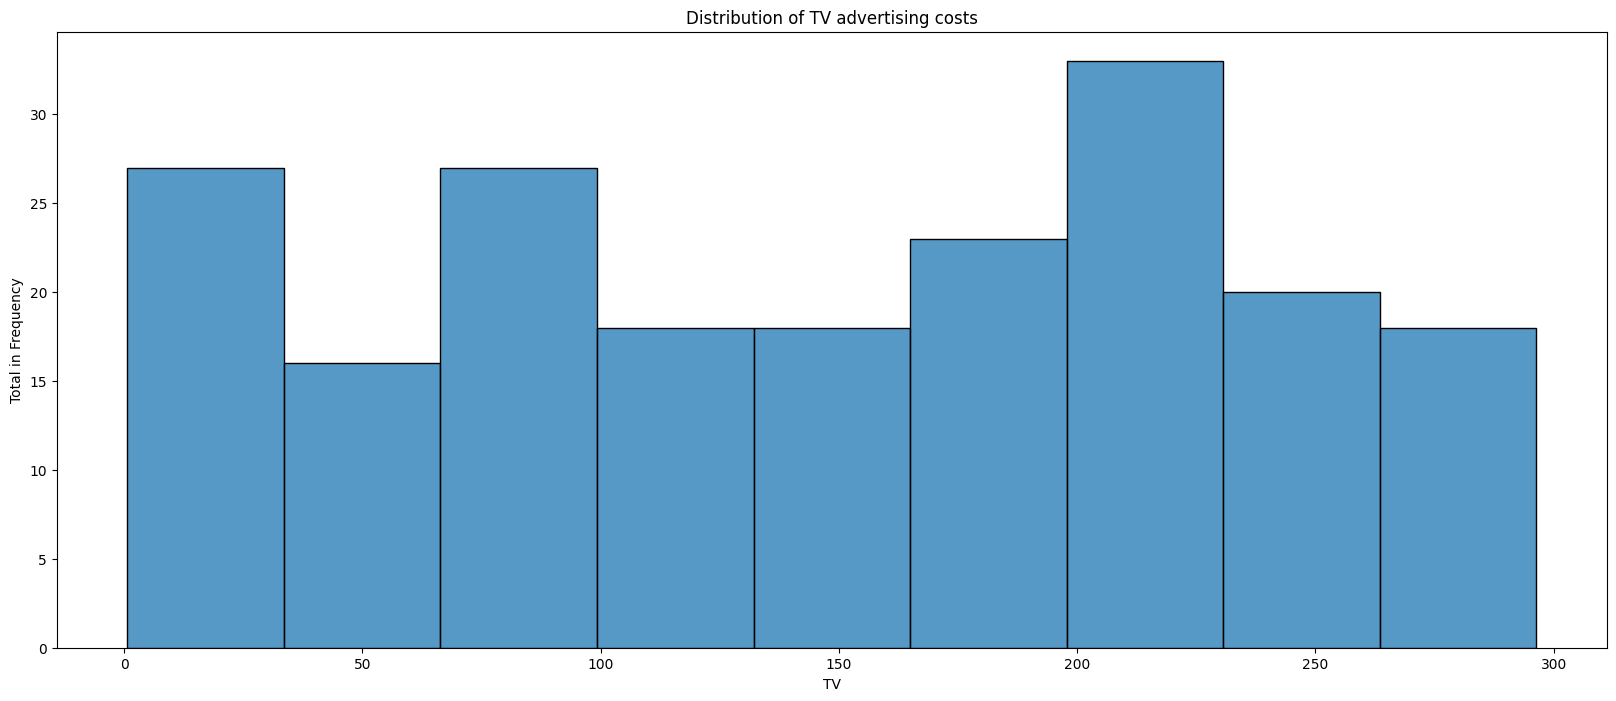

In [18]:
plot_histogram("TV") # A majority of spending ranges at 230

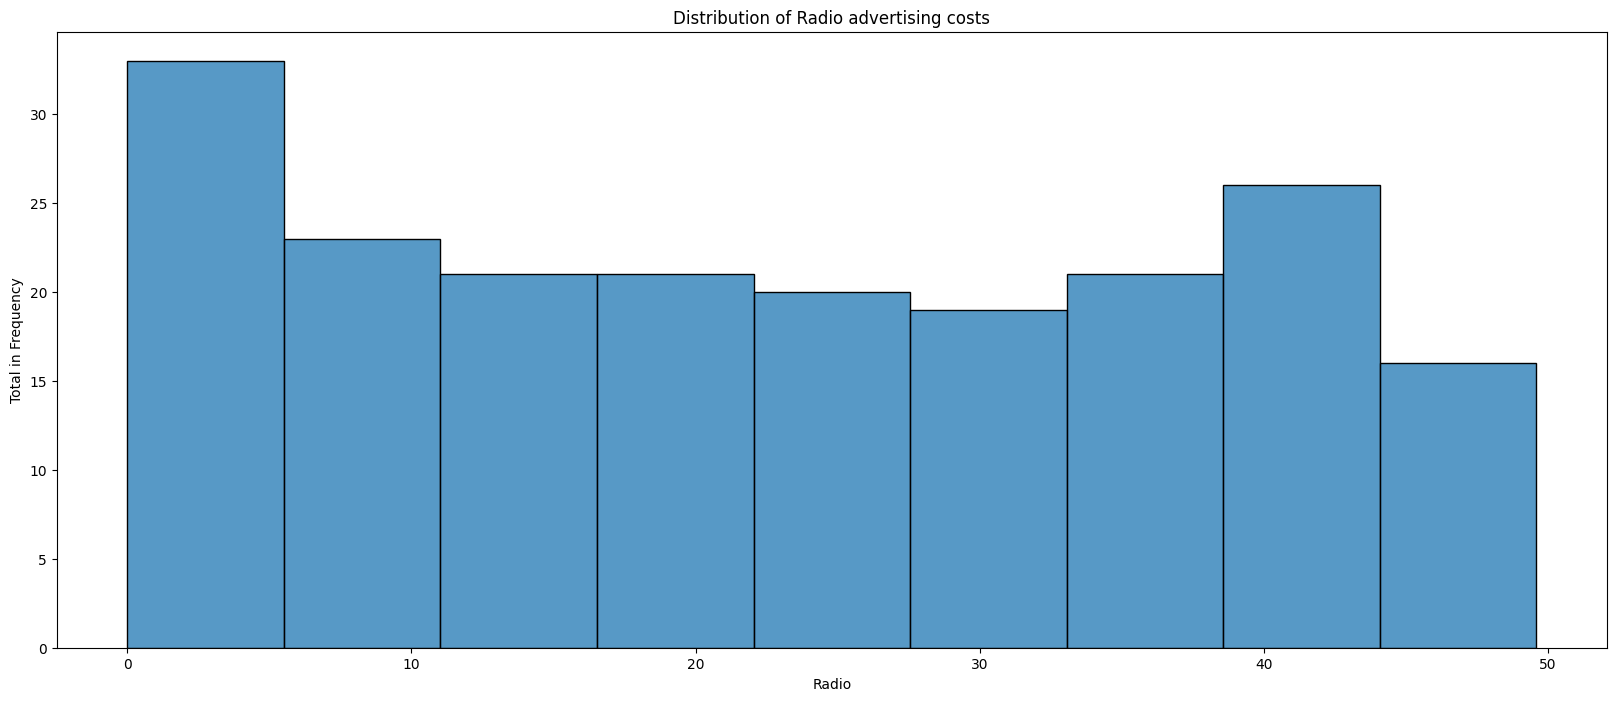

In [19]:
plot_histogram("Radio") # Prices are at 10 units

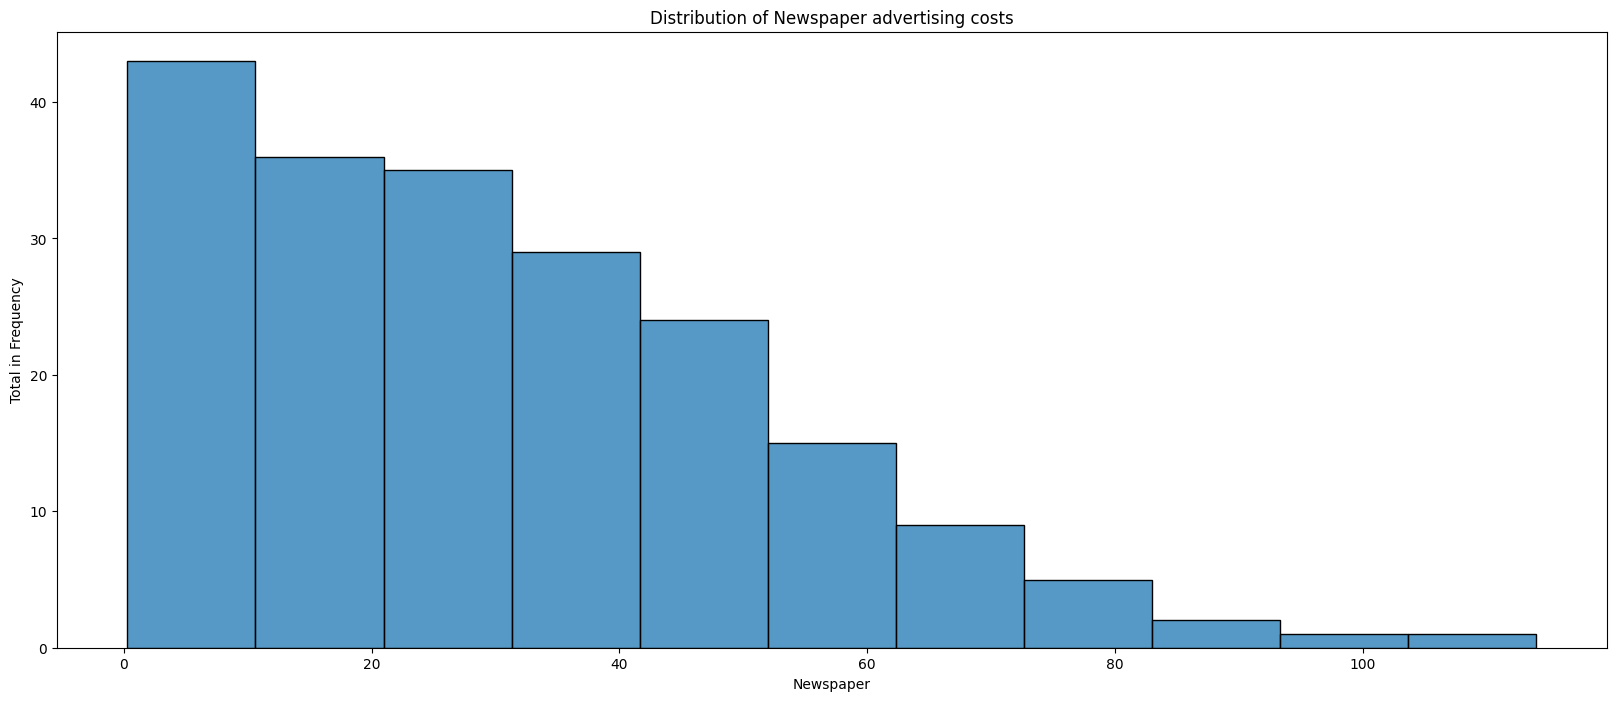

In [20]:
plot_histogram("Newspaper") # majority range at 10 units

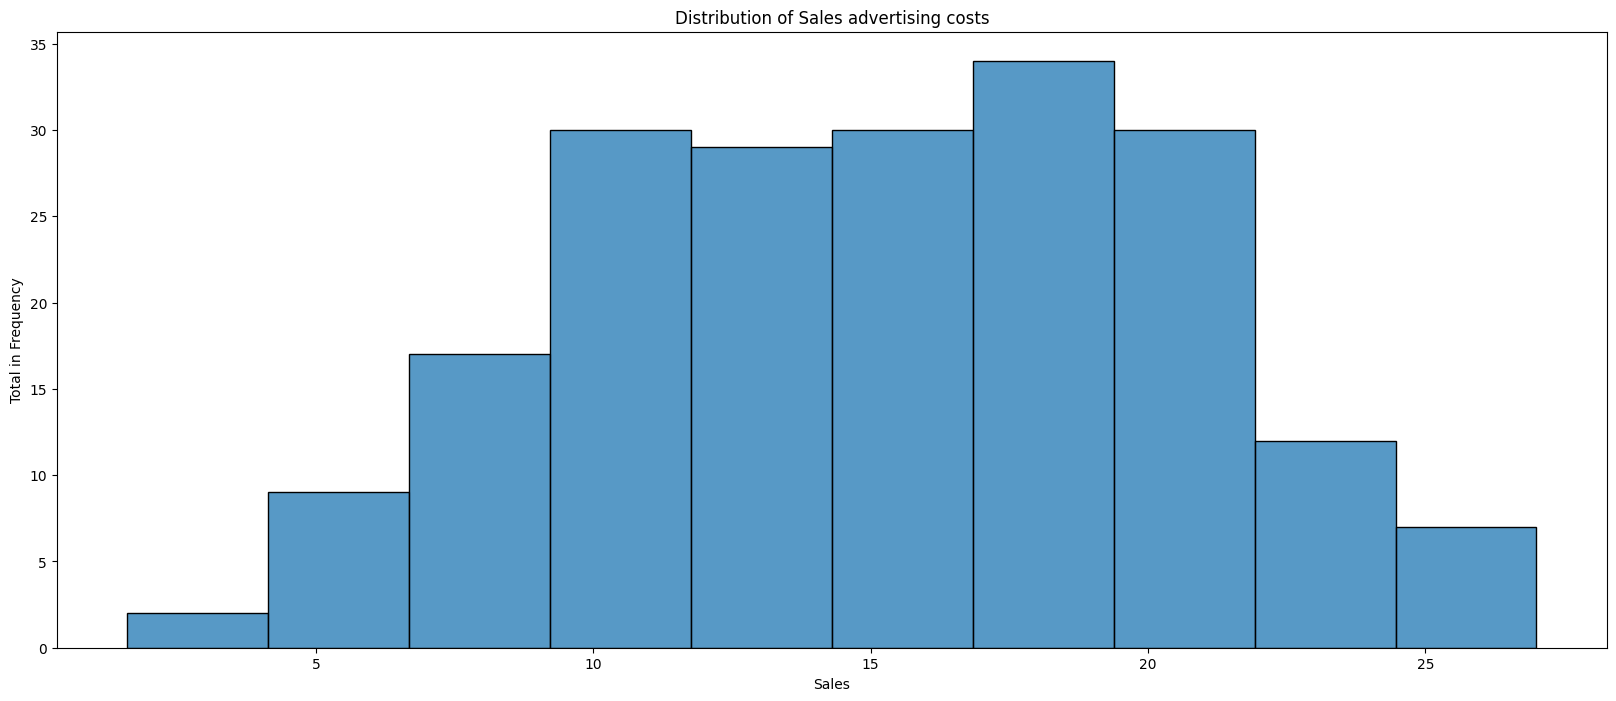

In [22]:
plot_histogram("Sales") # Majority costs are at 18 units

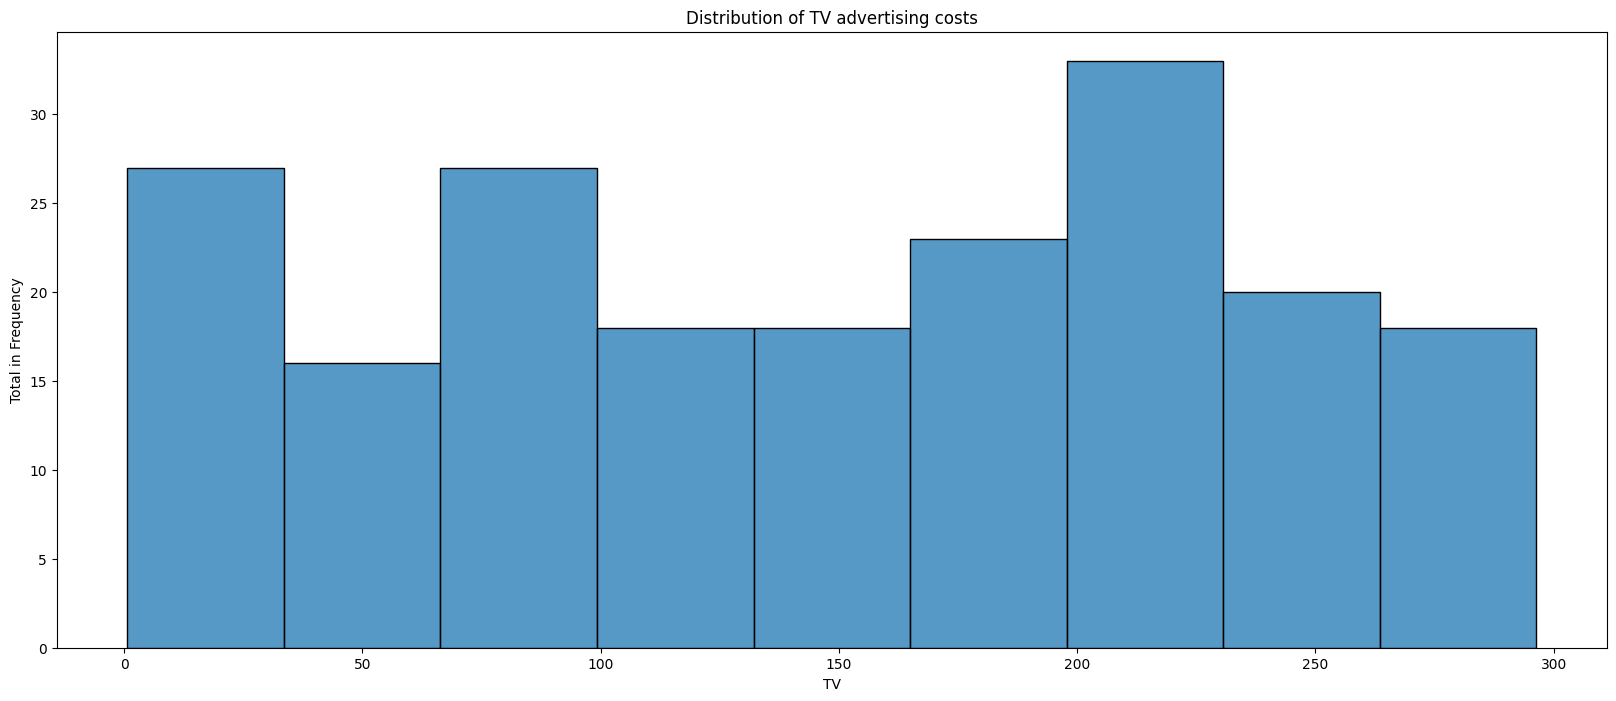

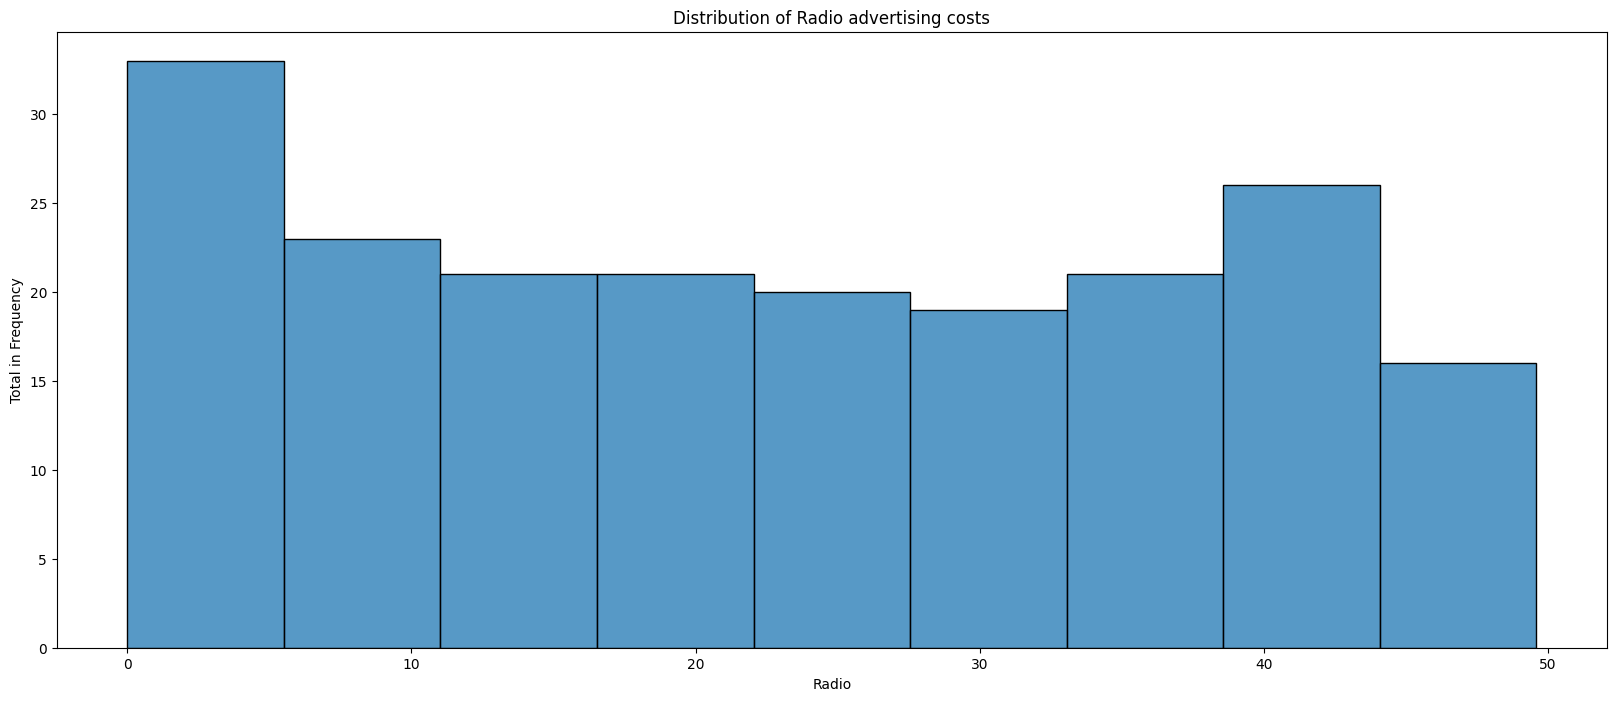

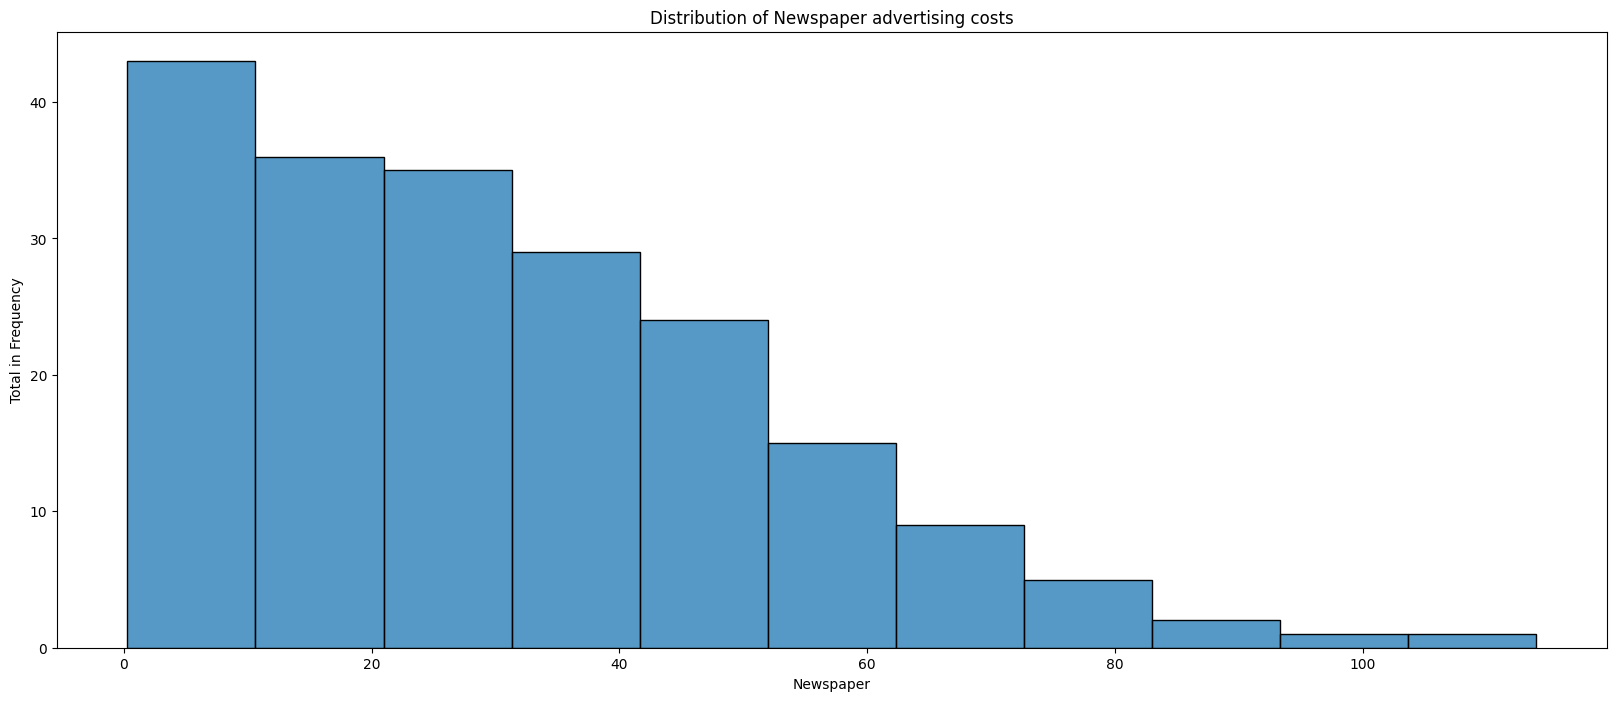

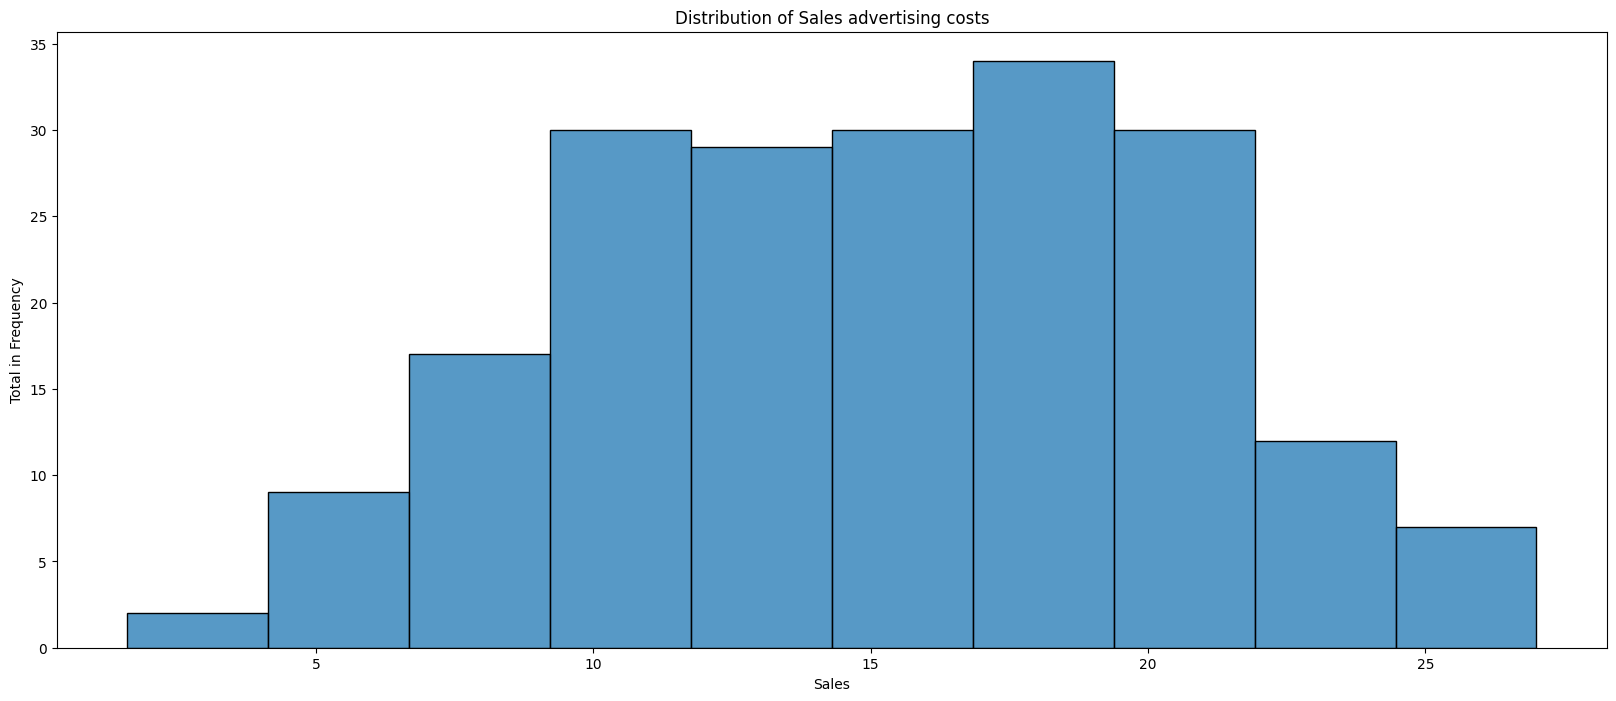

In [23]:
# Using Loops I can bring all these visaulizations together
for column in df.columns :
  plot_histogram(column)

In [24]:
# For the next visualizations I will plot a boxplot ,boxplots will aid me in identifying outliers

def plot_boxplot(column,df=df):
  fig = plt.figure(figsize=(20,8))
  sns.boxplot(x=column,data=df)
  plt.xlabel(column)
  plt.ylabel("Total in Frequency")
  plt.title(f"Boxplot Distribution of {column} advertising costs")
  plt.show()

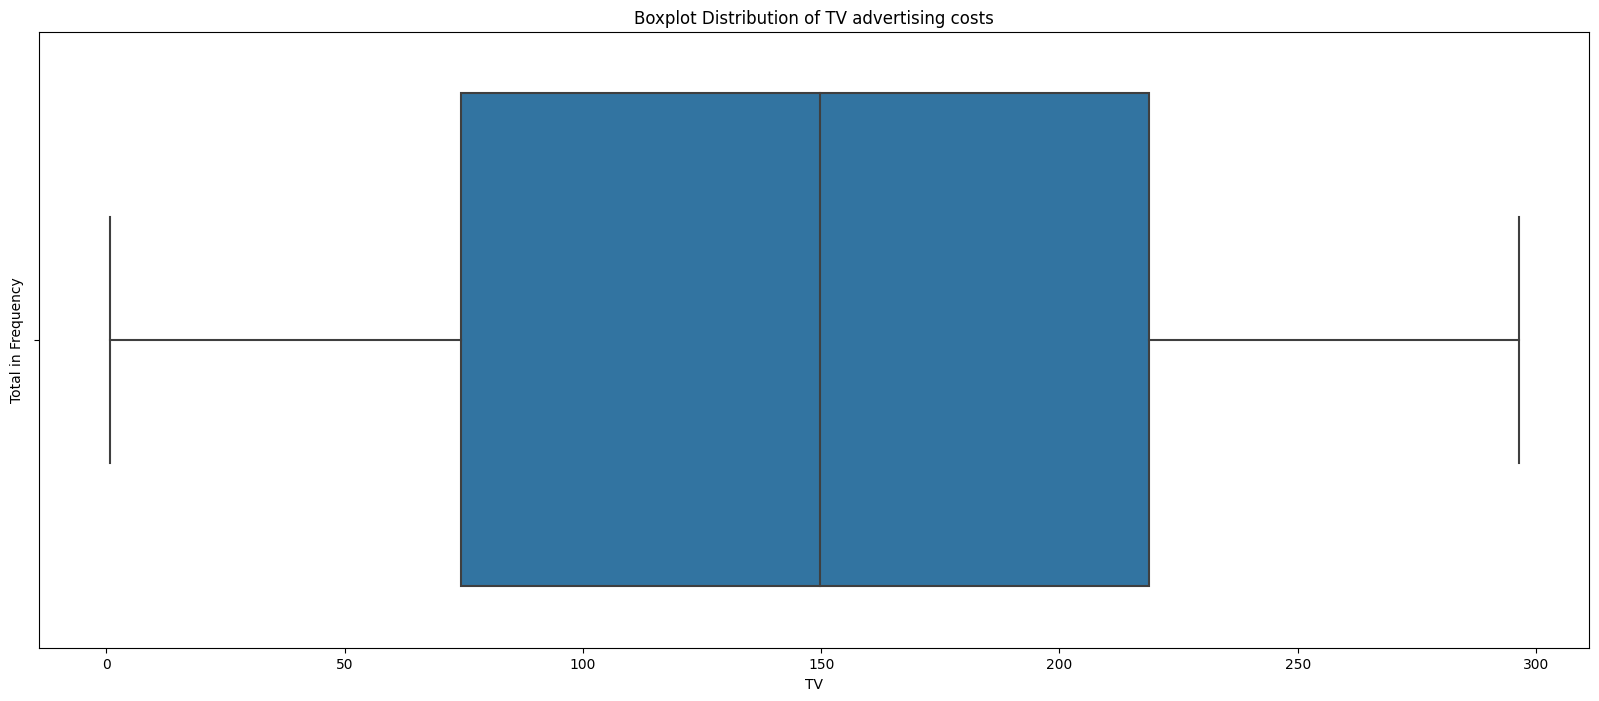

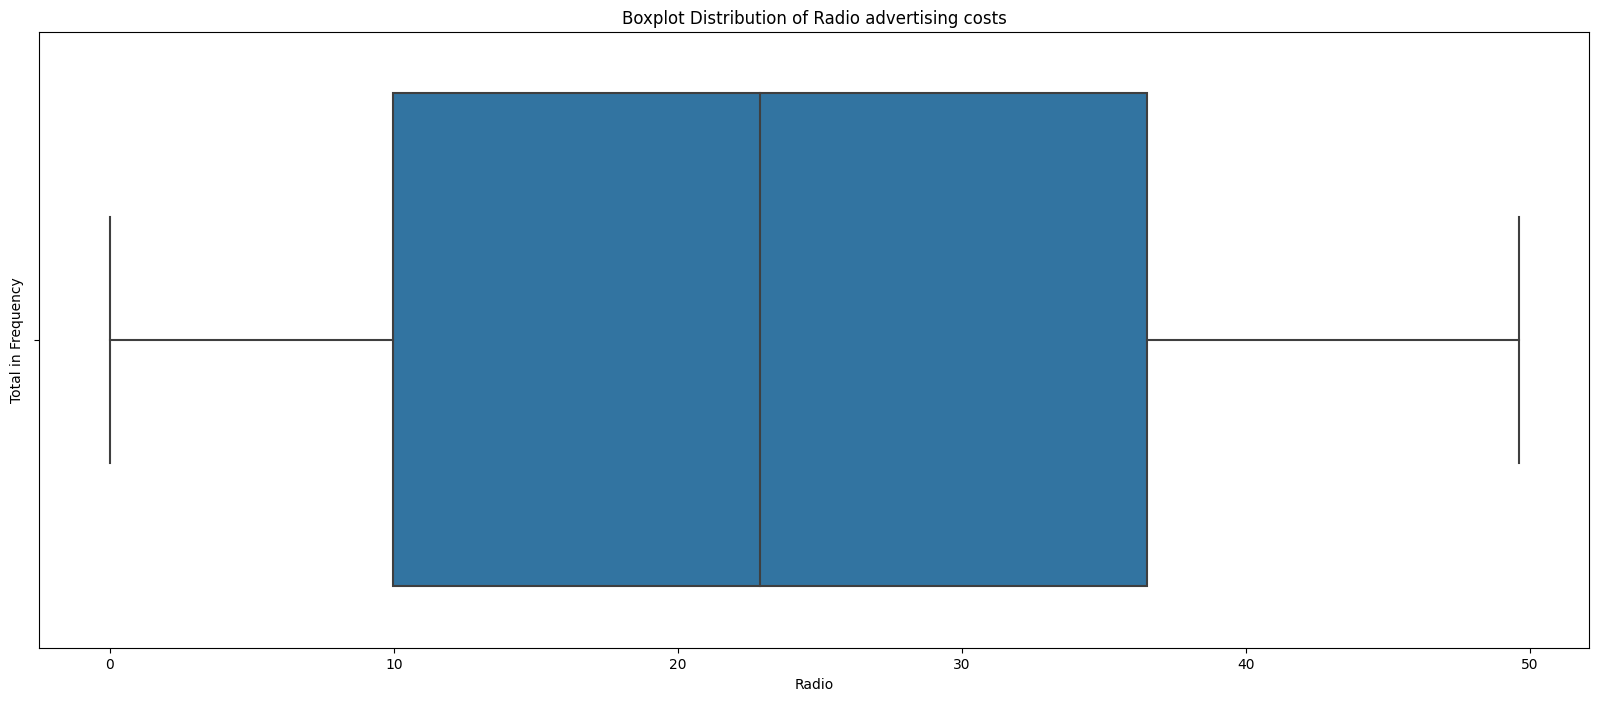

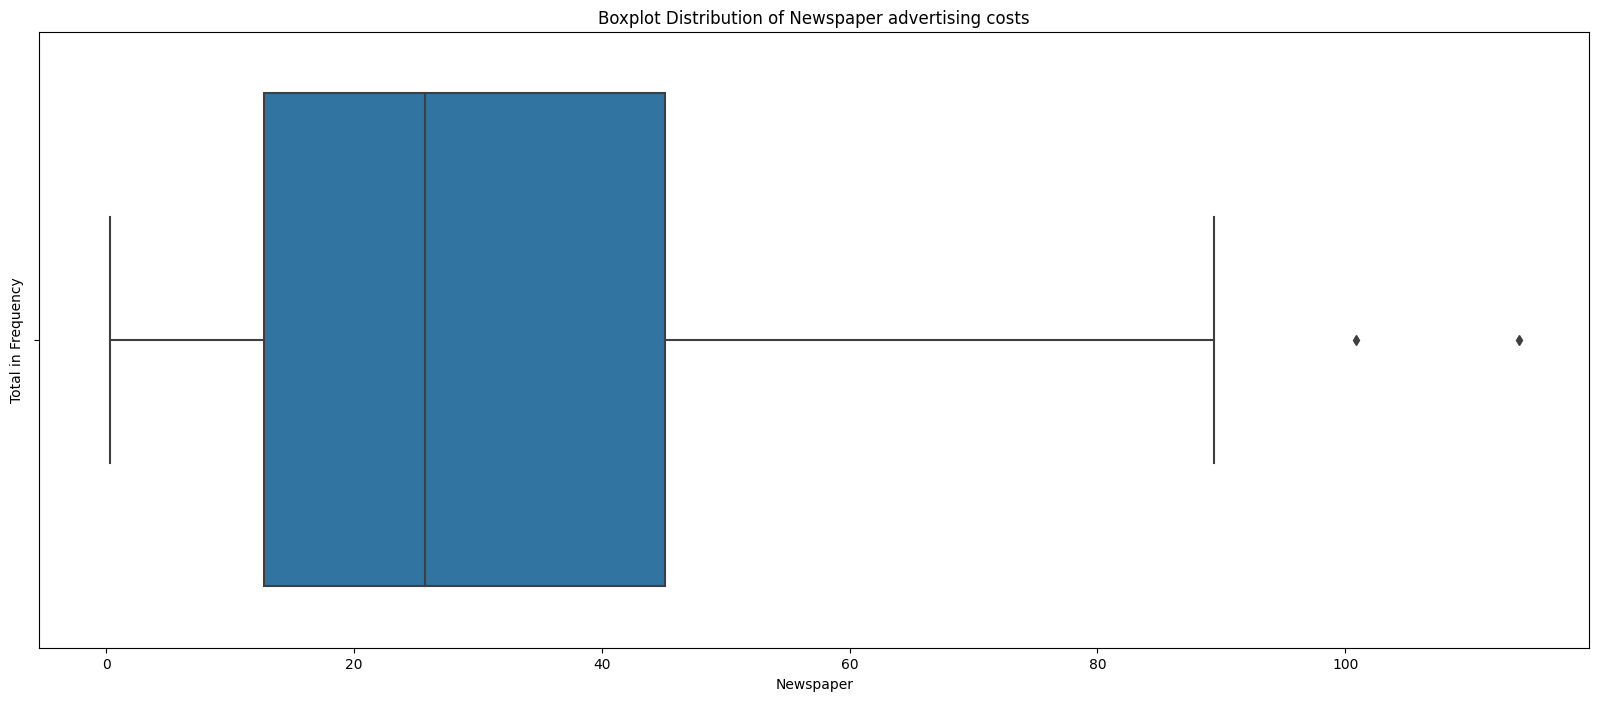

In [26]:
for column in df.columns :
  if column in ['Sales']:
    pass
  else :
    plot_boxplot(column) # Great to see that there are no outliers in our data

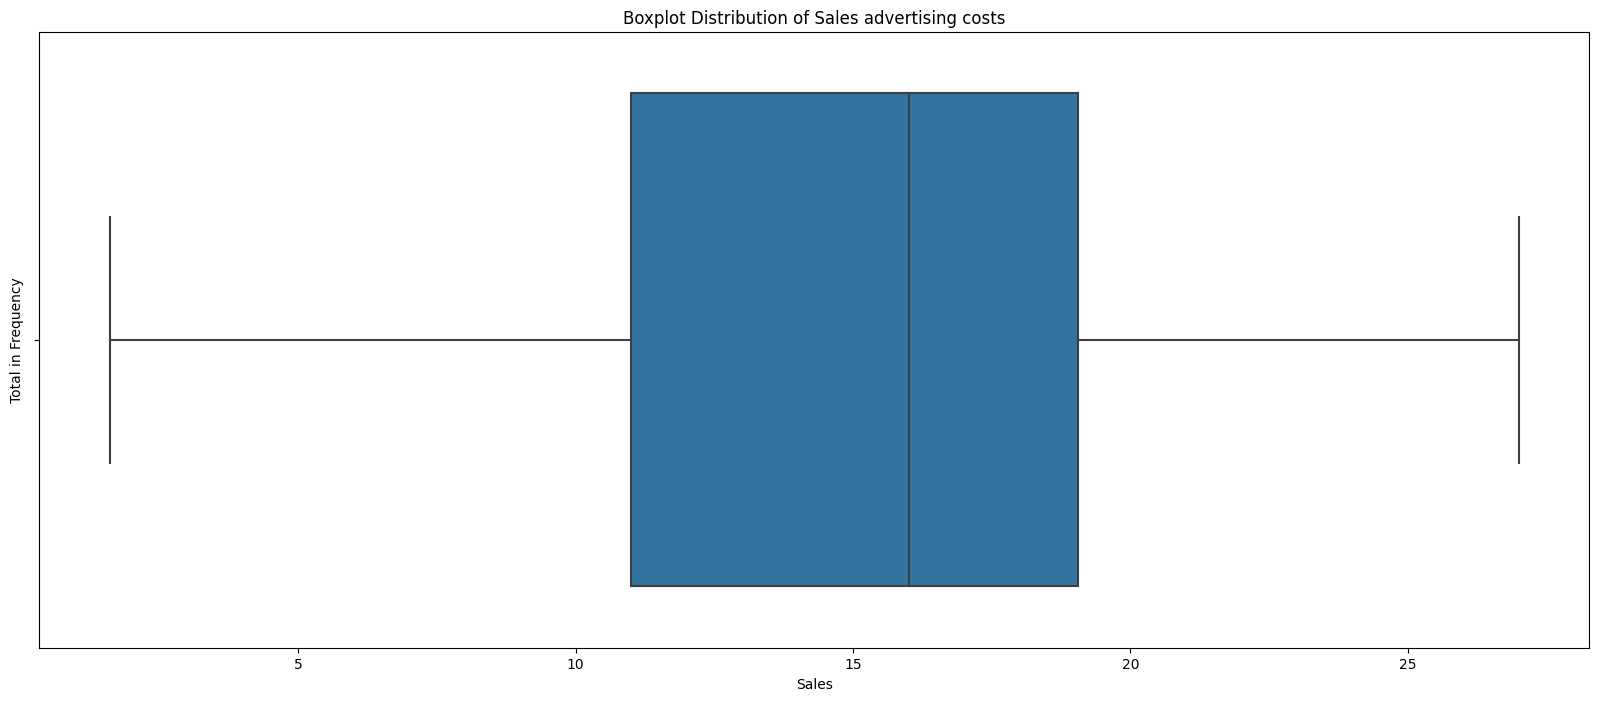

In [27]:
for column in df.columns :
  if column in ['Sales']:
    plot_boxplot(column)
  else :
    pass
     # Great to see that there are no outliers in our Sales values

In [40]:
# There has to be relationship between two variables in our data
# How can I tell ? Well I will use a jointplot and compare two variables against each other
# Sales is the dependent variable ,I'll set it as Y
def plot_jointplot(column1,column2='Sales',df=df):
  fig = plt.figure(figsize=(20,8))
  sns.jointplot(x=column1,y=column2,data=df)
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.title(f"Joint Distribution of {column1} advertising costs and {column2}")
  plt.show()

<Figure size 2000x800 with 0 Axes>

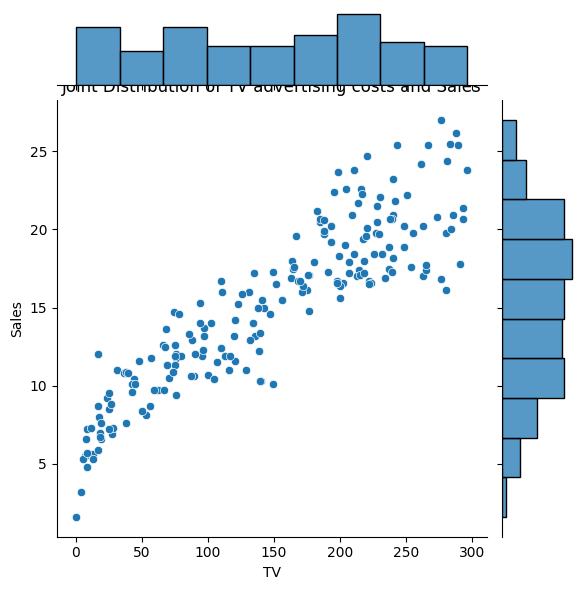

In [41]:
plot_jointplot("TV") #The more spending on TV advertisin the more the  Sales Increase

<Figure size 2000x800 with 0 Axes>

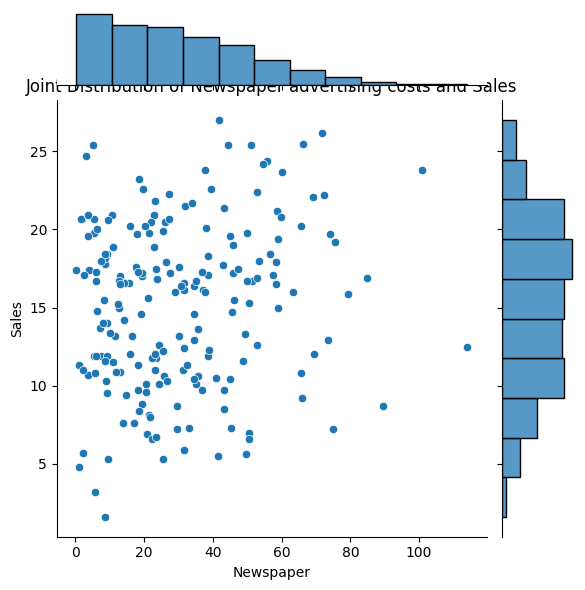

In [42]:
plot_jointplot("Newspaper")

<Figure size 2000x800 with 0 Axes>

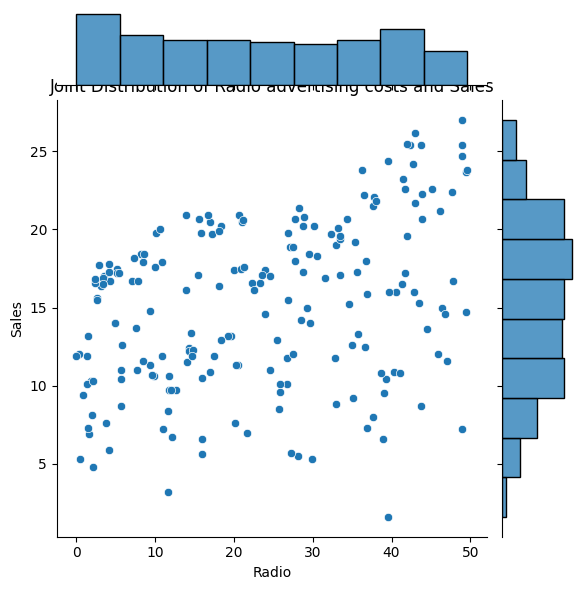

In [43]:
plot_jointplot('Radio')

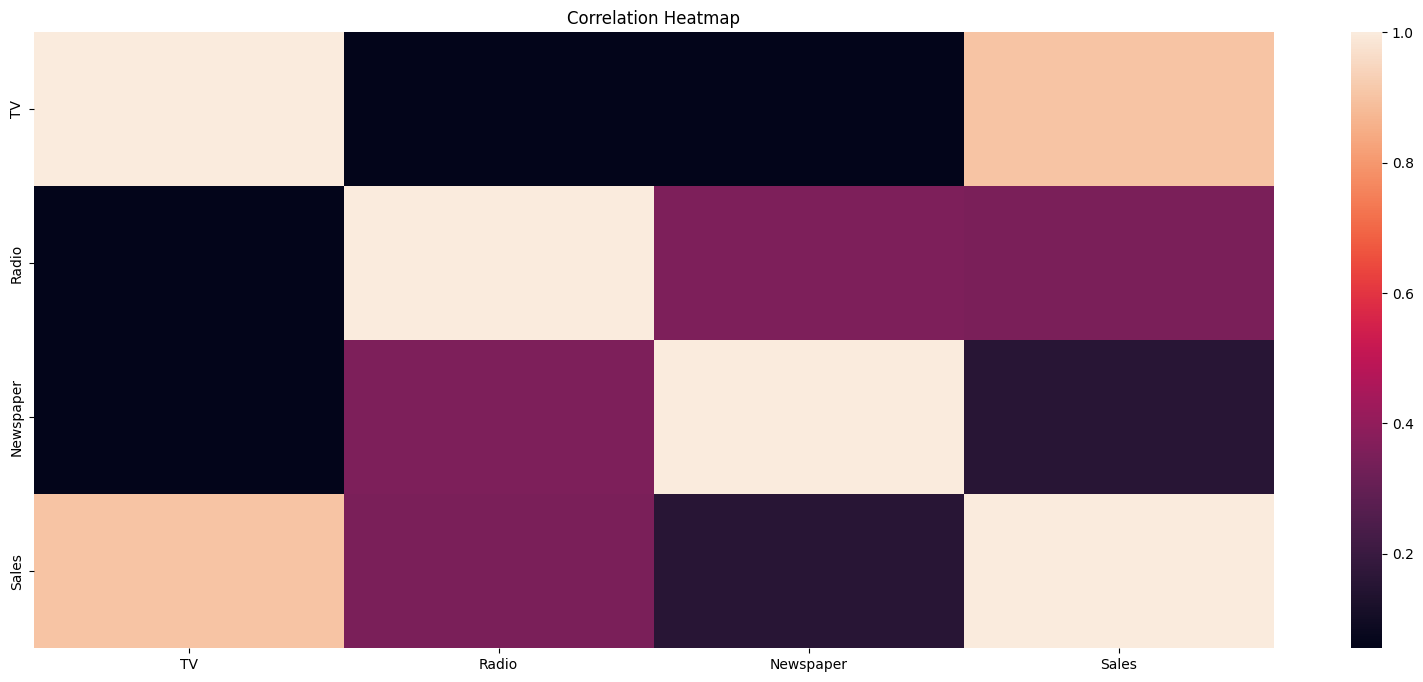

In [48]:
# I will plot a correlation heatmap to show correlation
plt.figure(figsize=(20,8))
sns.heatmap(sales_corr)
plt.title("Correlation Heatmap")
plt.show()

# PART 2 : FEATURE ENGINEERING AND FEATURE SELECTION

In [50]:
#For regression correlation is important,since we are trying to get a linear relationship
sales_corr # All the features are highly correlated with sales.TV costs lead

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [54]:
# I will use a LM plot for all the variables with relation to sales

def plot_lmplot(column1,column2='Sales',df=df):
  fig = plt.figure(figsize=(20,8))
  sns.lmplot(x=column,y=column2,data=df)
  plt.xlabel(column)
  plt.ylabel("Sales")
  plt.title(f"LM Plot Distribution of {column1} advertising costs on {column2}")
  plt.show()

<Figure size 2000x800 with 0 Axes>

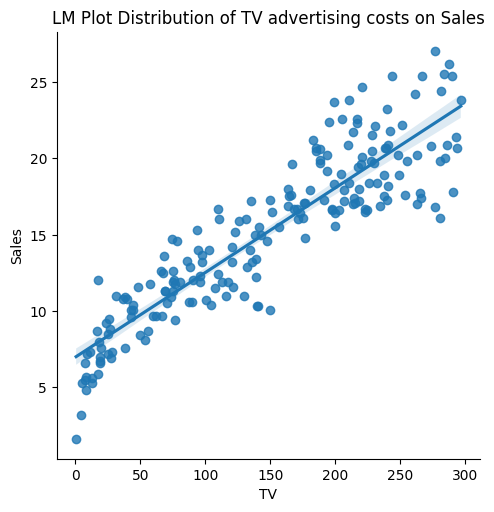

<Figure size 2000x800 with 0 Axes>

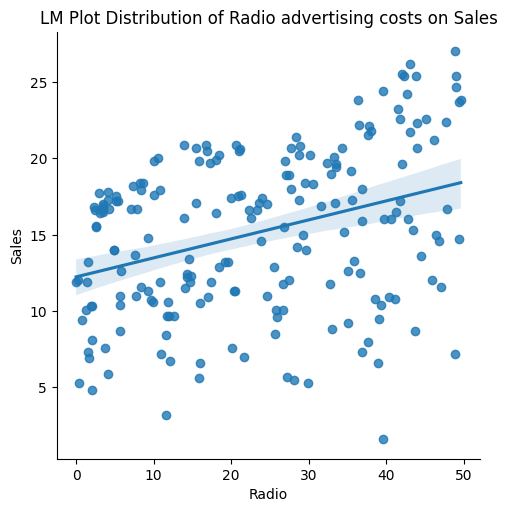

<Figure size 2000x800 with 0 Axes>

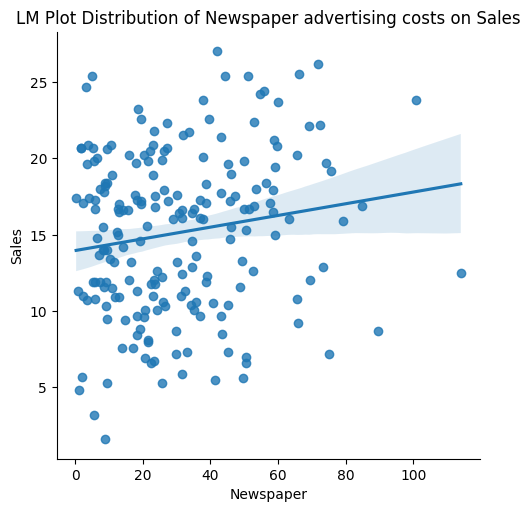

In [55]:
for column in df.columns :
  if column in 'Sales':
    pass
  else :
    plot_lmplot(column)

# FEATURE SELECTION

In [77]:
# I will select my X and Y variables
X = df.drop(["Sales"],axis=1)
y = df['Sales']

In [78]:
# I will scale my X variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [83]:
X = scaler.fit_transform(X)

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11272023)

# MACHINE LEARNING : LINEAR REGRESSION MODEL

In [90]:
lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(f"The first 10 predictions are : {predictions[:10]}")

The first 10 predictions are : [21.28343425 10.60670436 14.94881738 15.77224503 15.15214416 21.74266872
 10.24998177 21.90989729 17.5991117  24.97955192]


In [86]:
print (f"The Mean Square Error for our model is {mean_squared_error(y_test,predictions)}")
print (f"The Mean Absolute Error for our model is {mean_absolute_error(y_test,predictions)}")

The Mean Square Error for our model is 1.6456812866485229
The Mean Absolute Error for our model is 0.9801709414104108


MODEL EVALUATION USING MATPLOTLIB


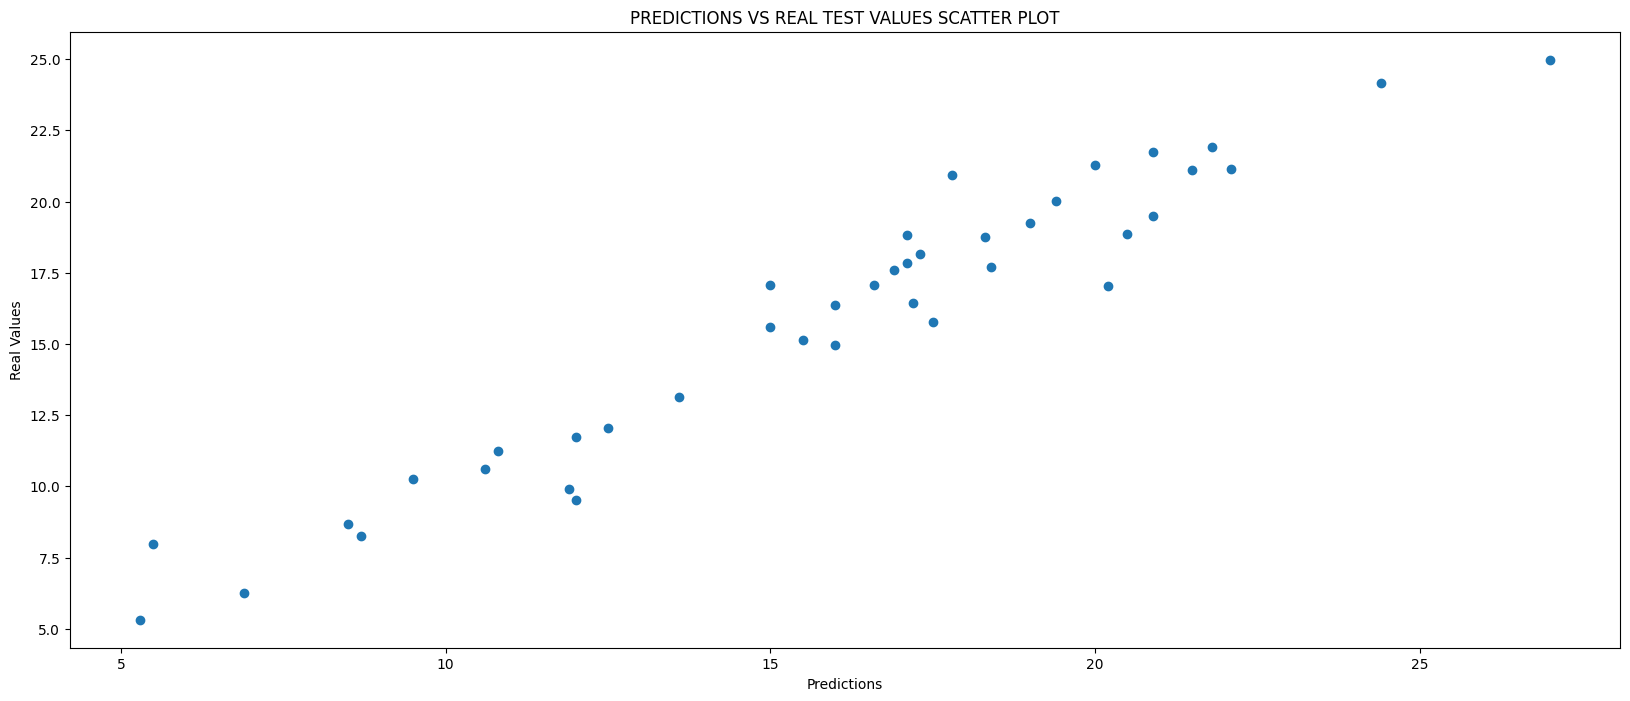

In [82]:
plt.figure(figsize=(20,8))
plt.scatter(y_test,predictions)
plt.title('PREDICTIONS VS REAL TEST VALUES SCATTER PLOT')
plt.xlabel("Predictions")
plt.ylabel('Real Values')
plt.show()

# CONCLUSION


The advertising costs spent on TV Ads paid of ,clearly the more the costs the more the Sales increased. I could say the same for the Radio Costs . However advertising through newspapers did not have a huge impact on the sales .We could conclude that this is because  less and less people read the newspaper in this time .

Fitting a Linear Regression model was a good choice given the high correlation between the target features and the label features. The Mean Squared Error for our model was **1.6456812866485229**
and The Mean Absolute Error for our model was **0.980170941410410**
